# Google Play Store EDA

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [2]:
df = pd.read_csv('googleplaystore.csv')

#### Display the first 10 rows of the dataset to get a quick look at the data

In [3]:
df.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

#### Display the total number of rows and columns in the dataset

In [4]:
rows, columns = df.shape
print(f"This dataset contains {rows} rows and {columns} columns.")

This dataset contains 10841 rows and 13 columns.


#### Display column names

In [5]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


#### Based on the publicly available Play Store metadata, the meaning of each column in the dataset is as follows:

- App - Name of the application as listed on the Google Play Store.
- Category - Primary category under which the app is classified.
- Rating - Average user rating of the app on a scale of 1 to 5.
- Reviews - Total number of user reviews submitted for the app.
- Size - Storage size of the app as reported on the Play Store.
- Installs - Approximate number of times the app has been installed by users.
- Type - Indicates whether the app is Free or Paid.
- Price - Price of the app (0 indicates a free app).
- Content Rating - Target age group suitability (e.g., Everyone, Teen, Mature).
- Genres - Specific genre or sub-genres associated with the app.
- Last Updated - Date when the app was most recently updated.
- Current Ver - Current version of the application.
- Android Ver - Minimum Android OS version required to run the app.


In [6]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

#### Display columns along with their data types

In [7]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


#### Obersvations on Data Types

Clearly Some columns in the dataset are **not in the proper data type** for analysis.  

For example, `Reviews`, `Size`, `Installs`, and `Price` are stored as `object` instead of numeric types,  
and `Last Updated` is stored as `object` instead of `datetime`.  

These columns will need **cleaning and type conversion** before the analysis.

#### Checking all unique values of each column

In [8]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column Name : {col}")
    print(f"Number of unique values : {len(unique_vals)}")
    print(f"All unique values : {unique_vals}")
    print('-'*50)

Column Name : App
Number of unique values : 9660
All unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------------------------------------
Column Name : Category
Number of unique values : 34
All unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
--------------------------------------------------
Column Name : Rating
Number of unique values : 

#### Summary from the observations

- Columns with correct types: App, Content Rating, Current Ver are mostly fine
- Columns needing conversions/cleaning: Reviews, Size, Installs, Type, Price, Last Updated, Android Ver
- Columns with anomalies/invalid entries are:
* Category (1.9)
* Rating (19.)
* Type (0),
* Installs (Free)
* Price (Everyone)
* Size (varies with device)
* Android Ver (varies with device)

#### Checking for missing values per column (including empty strings)

In [9]:
# Count of NaN / None values per column
nan_count = df.isnull().sum()

# Count of empty strings per column
empty_count = (df == '').sum()

# Total missing values (NaN + empty strings)
total_missing = nan_count + empty_count

# Percentage of missing values
missing_percent = (total_missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': total_missing,
    'Percentage (%)': missing_percent
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_df)


                Missing Values  Percentage (%)
Rating                    1474       13.596532
Current Ver                  8        0.073794
Android Ver                  3        0.027673
Content Rating               1        0.009224
Type                         1        0.009224
Size                         0        0.000000
Reviews                      0        0.000000
Category                     0        0.000000
App                          0        0.000000
Price                        0        0.000000
Installs                     0        0.000000
Last Updated                 0        0.000000
Genres                       0        0.000000


#### Cleaning of the Data for Insights 

##### 1. App
- Type: Categorical / Object  
- Observations: Names of apps are unique and valid.  
- Treatment: No cleaning required. 

##### 2. Category
- Type: Object  
- Observations: Mostly fine, but one invalid entry '1.9'.  
- Treatment: Revoving the row with value of 1.9 and also converting the data type from object to category

In [10]:
# Remove invalid Category entry '1.9'
df = df[df['Category'] != '1.9']

In [11]:
# Converting data type from object to category
df['Category'] = df['Category'].astype('category')

##### 2. Rating
- **Type:** Float  
- **Observations:** Valid ratings are between 1 and 5; anomalies like `19` exist, and there are 1,474 missing values (~13.6%).  
- **Treatment:** Remove the anomaly with value `19` and replace missing values with **median** (preferred for skewed distributions) or **mean** if the data is roughly symmetric.


In [12]:
# Keep only ratings between 1 and 5
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

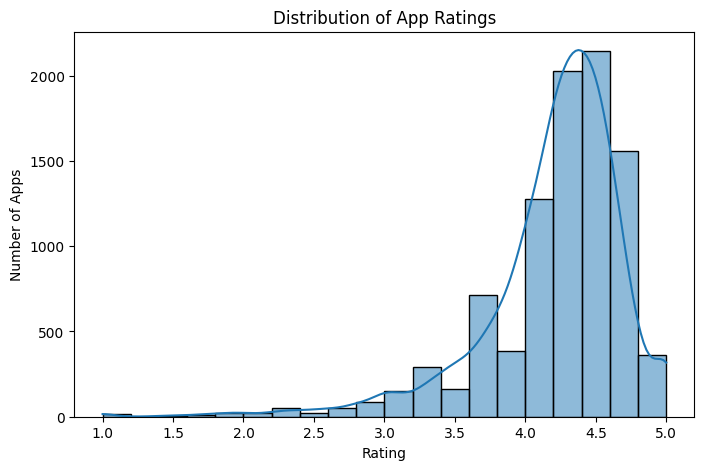

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True) 
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


In [14]:
# Calculate mean and median
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")


Mean Rating: 4.191757420456972
Median Rating: 4.3


The Rating distribution is left-skewed, indicating most apps have high ratings (3.5–5). Few apps are rated poorly. The median rating is 4.3, which is slightly higher than the mean 4.1 due to the left skew.


In [15]:
# Replace missing Rating values with median
df['Rating'].fillna(df['Rating'].median())


0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9366, dtype: float64

### 4. Reviews
- **Type:** Object 
- **Observations:** Needs conversion to numeric; no missing values.  
- **Treatment:** ✅ Convert to numeric type.  

In [16]:
# Converting data type from object to 
df['Reviews'] = df['Reviews'].astype('Int64') 

### 5. Size
- **Type:** Numeric (currently object)  
- **Observations:** Values like `'Varies with device'`; suffixes `'M'` or `'k'`.  
- **Treatment:** ❌ Replace `'Varies with device'` with NaN; convert `'M'/'k'` to numeric; fill missing with **median**.  


In [17]:
# Replacing 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Removing trailing 'M' or 'k' and convert to numeric in KB format
def size_to_numeric(size):
    if pd.isna(size):
        return np.nan
    size = size.strip()
    if size[-1] == 'M':  # Megabytes
        return float(size[:-1]) * 1_000  # Convert M to KB (optional, or keep as MB)
    elif size[-1] == 'k':  # Kilobytes
        return float(size[:-1])
    else:
        return float(size)  # Already numeric

df['Size'] = df['Size'].apply(size_to_numeric)

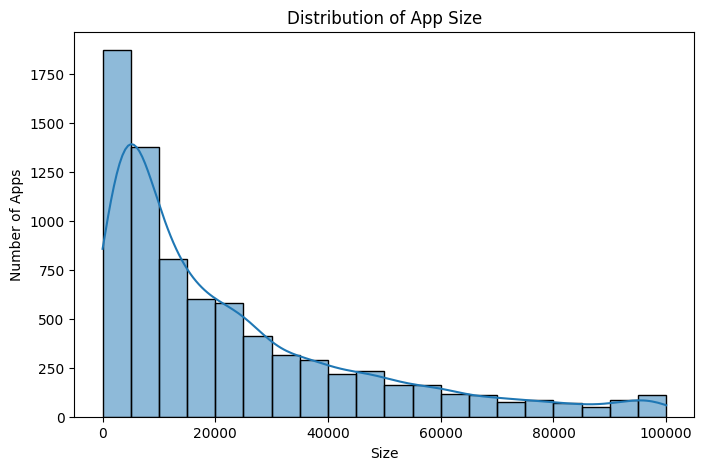

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Size'], bins=20, kde=True) 
plt.title('Distribution of App Size')
plt.xlabel('Size')
plt.ylabel('Number of Apps')
plt.show()

In [19]:
# Calculate mean and median
mean_rating = df['Size'].mean()
median_rating = df['Size'].median()

print(f"Mean Size: {mean_rating}")
print(f"Median Size: {median_rating}")

Mean Size: 22957.606870229007
Median Size: 14000.0


The Size distribution is right-skewed: most apps are small (<50 MB), but a few apps are very large (>500 MB). The median app size is 14 MB, while the mean is 23 MB, indicating that a small number of very large apps pull the average upward.


### 6. Installs
- **Type:** Numeric (currently object)  
- **Observations:** Values like `'10,000+'`; some anomalies like `'Free'`.  
- **Treatment:** ❌ Remove non-numeric values; remove commas and plus signs; convert to int; fill missing with **median**. 

In [20]:
import pandas as pd
import numpy as np

# Replacing non-numeric entries with NaN
df['Installs'] = df['Installs'].replace('Free', np.nan)

# Removing commas and plus signs
df['Installs'] = df['Installs'].str.replace(',', '', regex=True)
df['Installs'] = df['Installs'].str.replace(r'\+', '', regex=True)  # escape +

# Converting to numeric
df['Installs'] = df['Installs'].astype(int)

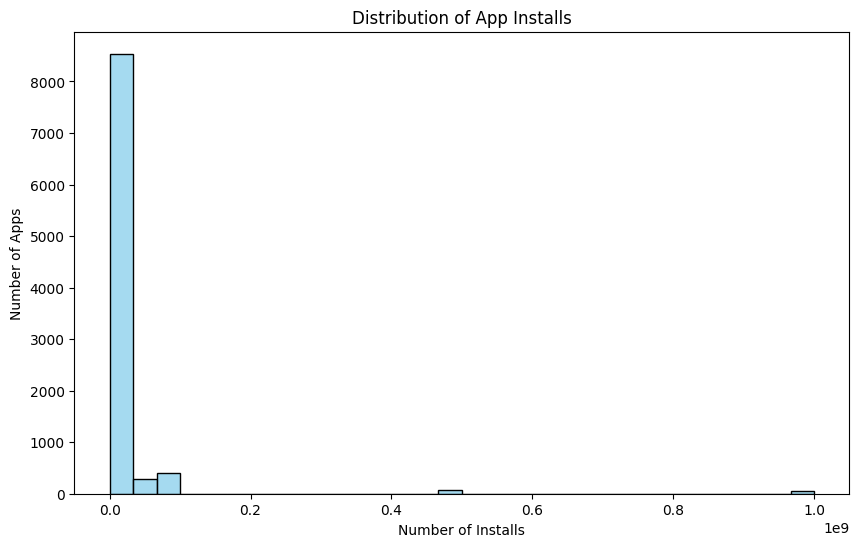

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Installs'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Installs')
plt.show()


In [22]:
# Calculating the mean and median
mean_rating = df['Installs'].mean()
median_rating = df['Installs'].median()

print(f"Mean Size: {mean_rating}")
print(f"Median Size: {median_rating}")

Mean Size: 17897443.726030324
Median Size: 500000.0


The Installs distribution is right-skewed: most apps have relatively few installs, but a few apps have very high installs (millions or even billions). The median number of installs is 500000, while the mean is much higher, indicating that a small number of extremely popular apps pull the average upward.


### 7. Type
- **Type:** Categorical / Object
- **Observations:** Mostly `'Free'` or `'Paid'`; one invalid value `'0'`.
- **Treatment:** :x: Replace invalid values with **Unknown**.

In [23]:
# Finding the mode
type_mode = df['Type'].mode()[0]
print("Mode of Type:", type_mode)

# Replacing invalid '0' and NaN with the mode
df['Type'] = df['Type'].replace('0', type_mode)
df['Type'] = df['Type'].fillna(type_mode)

#  Verifying
print(df['Type'].unique())

df['Type'] = df['Type'].astype('category')


Mode of Type: Free
['Free' 'Paid']


### 8. Price
- **Type:** Numeric (currently object)
- **Observations:** Strings with `$`; some invalid entries like `'Everyone'`.
- **Treatment:** :x: Remove invalid entries; convert to float; fill missing with **median** (0 for free apps).

In [24]:
# Replacing invalid entries (like 'Everyone') with NaN
df['Price'] = df['Price'].replace('Everyone', np.nan)

# Removing $ and convert to numeric
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Filling missing values
# Assuming missing price for Free apps is 0
df.loc[df['Type'] == 'Free', 'Price'] = df.loc[df['Type'] == 'Free', 'Price'].fillna(0)

# Verifying
print(df['Price'].head())
print(df['Price'].dtype)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64
float64


### 9. Content Rating
- **Type:** Categorical / Object
- **Observations:** Mostly valid; 1 missing value.
- **Treatment:**  Fill missing with **mode**.

In [25]:
# Checking the mode
content_mode = df['Content Rating'].mode()[0]
print("Mode of Content Rating:", content_mode)

# Filling missing values with mode
df['Content Rating'] = df['Content Rating'].fillna(content_mode)

# Verifying
print(df['Content Rating'].unique())

df['Content Rating'] = df['Content Rating'].astype('category')

Mode of Content Rating: Everyone
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


### 10. Genres
- **Type:** Categorical / Object
- **Observations:** Multiple genres separated by `;`; generally fine.
- **Treatment:** :white_tick: No treatment needed; can split later for detailed analysis.

In [26]:
df['Genres'] = df['Genres'].astype('category')

### 11. Last Updated
- **Type:** Date / Object
- **Observations:** Needs datetime conversion.
- **Treatment:** :x: Convert to `datetime` type; missing values can be left if few.

In [27]:
# Converting to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Verifying
print(df['Last Updated'].dtype)
print(df['Last Updated'].head())
print(df['Last Updated'].isna().sum())

datetime64[ns]
0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]
0


### Current Ver
- **Type:** Categorical / Object  
- **Observations:** Mostly technical version info; 8 missing values.  
- **Treatment:** ❌ Dropped the column.  

**Reason:**  
`Current Ver` mainly provides the latest version of the app, which is a **technical detail** and does not contribute to **business insights** like app popularity, installs, ratings, or pricing. Since it has little analytical value, it has been removed to simplify the dataset.


In [28]:
# Droping the 'Current Ver' column
df = df.drop(columns=['Current Ver'])

# Verifying
print(df.columns)


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Android Ver'],
      dtype='object')


### 13. Android Ver
- **Type:** Categorical / Object
- **Observations:** Strings like `'4.0.3 and up'`; some `'Varies with device'`; 3 missing values.
- **Treatment:** :x: Extract numeric minimum version; replace `'Varies with device'` with NaN; fill missing with **median**.

In [29]:
import numpy as np
import re

# Replacing the 'Varies with device' with NaN
df['Minimum Android Version Required'] = df['Android Ver'].replace('Varies with device', np.nan)

# Extracting the minimum numeric version
def extract_min_version(ver):
    if pd.isna(ver):
        return np.nan
    # Find all numbers like 4.0.3, 7.1 etc
    nums = re.findall(r'\d+\.\d+', ver)
    if nums:
        # Take the first one as minimum version
        return float(nums[0])
    else:
        return np.nan

df['Minimum Android Version Required'] = df['Minimum Android Version Required'].apply(extract_min_version)

# Filling missing values with median
median_version = df['Minimum Android Version Required'].median()
df['Minimum Android Version Required'] = df['Minimum Android Version Required'].fillna(median_version)

# Verifying
print(df[['Android Ver', 'Minimum Android Version Required']].head(10))


    Android Ver  Minimum Android Version Required
0  4.0.3 and up                               4.0
1  4.0.3 and up                               4.0
2  4.0.3 and up                               4.0
3    4.2 and up                               4.2
4    4.4 and up                               4.4
5    2.3 and up                               2.3
6  4.0.3 and up                               4.0
7    4.2 and up                               4.2
8    3.0 and up                               3.0
9  4.0.3 and up                               4.0


In [30]:
df = df.drop(columns=['Android Ver'])
df['Minimum Android Version Required'] = df['Minimum Android Version Required'].astype('category')
df.dtypes

App                                         object
Category                                  category
Rating                                     float64
Reviews                                      Int64
Size                                       float64
Installs                                     int64
Type                                      category
Price                                      float64
Content Rating                            category
Genres                                    category
Last Updated                        datetime64[ns]
Minimum Android Version Required          category
dtype: object

In [31]:
# Checking the data summary after cleaning
print(df.shape)

# Checking the data summary after cleaning
print(df.describe())

(9366, 12)
            Rating         Reviews           Size      Installs        Price  \
count  9366.000000          9366.0    7729.000000  9.366000e+03  9366.000000   
mean      4.191757   514049.836536   22957.606870  1.789744e+07     0.960928   
min       1.000000             1.0       8.500000  1.000000e+00     0.000000   
25%       4.000000          186.25    5300.000000  1.000000e+04     0.000000   
50%       4.300000          5930.5   14000.000000  5.000000e+05     0.000000   
75%       4.500000        81532.75   33000.000000  5.000000e+06     0.000000   
max       5.000000      78158306.0  100000.000000  1.000000e+09   400.000000   
std       0.515219  3144042.127009   23445.491095  9.123822e+07    15.816585   

                        Last Updated  
count                           9366  
mean   2017-11-29 09:44:32.901986048  
min              2010-05-21 00:00:00  
25%              2017-10-09 00:00:00  
50%              2018-06-01 00:00:00  
75%              2018-07-24 00:00:

In [32]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column Name : {col}")
    print(f"Number of unique values : {len(unique_vals)}")
    print(f"All unique values : {unique_vals}")
    print('-'*50)

Column Name : App
Number of unique values : 8196
All unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------------------------------------
Column Name : Category
Number of unique values : 33
All unique values : ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (33, object): ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ..., 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']
--------------------------------------------------
Column Name : Rating
Number of unique values : 39
All unique values : [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.

# Time for Insights 

## Univaraite Analysis

In [48]:
import plotly.express as px

# -------------------------
# CATEGORICAL VARIABLES 
# -------------------------

# 1 Number of Apps per Category (top 10, sorted, horizontal)
category_counts = (
    df['Category']
    .value_counts()
    .rename_axis('Category')
    .reset_index(name='Count')
)

# Use all categories
fig = px.bar(
    category_counts,
    x='Count',
    y='Category',
    orientation='h',
    title='Number of Apps per Category (All Categories)',
    text='Count'
)

# Ensure all categories are displayed properly
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(
        categoryorder='total ascending',  # sort bars by count
        automargin=True  # prevent long labels from being cut off
    ),
    height=1200  # increase figure height to fit 33 categories
)
fig.show()


# 2 Free vs Paid Apps
type_counts = (
    df['Type']
    .value_counts()
    .rename_axis('Type')
    .reset_index(name='Count')
)

fig = px.bar(
    type_counts,
    x='Type',
    y='Count',
    title='Free vs Paid Apps',
    text='Count'
)
fig.update_traces(textposition='outside')
fig.show()


# 3 Content Rating distribution
content_counts = (
    df['Content Rating']
    .value_counts()
    .rename_axis('Content Rating')
    .reset_index(name='Count')
)

fig = px.bar(
    content_counts,
    x='Content Rating',
    y='Count',
    title='Apps by Content Rating',
    text='Count'
)
fig.update_traces(textposition='outside')
fig.show()


# 4 Top 10 Genres
top_genres = (
    df['Genres']
    .value_counts()
    .head(10)
    .rename_axis('Genre')
    .reset_index(name='Count')
)

fig = px.bar(
    top_genres,
    x='Genre',
    y='Count',
    title='Top 10 App Genres',
    text='Count'
)
fig.update_traces(textposition='outside')
fig.update_xaxes(tickangle=45)
fig.show()


In [51]:
# -------------------------
# NUMERIC VARIABLES (NO LOGS)
# -------------------------

# 1. Rating distribution
fig = px.histogram(
    df,
    x='Rating',
    nbins=20,
    title='App Ratings Distribution',
    marginal='box',
    text_auto=True  # display counts on bars
)
fig.show()


# 2. Reviews distribution (normal scale)
fig = px.histogram(
    df,
    x='Reviews',
    nbins=30,
    title='Distribution of Reviews',
    marginal='box',
    text_auto=True
)
fig.show()


# 3. Installs distribution (normal scale)
fig = px.histogram(
    df,
    x='Installs',
    nbins=30,
    title='Distribution of Installs',
    marginal='box',
    text_auto=True
)
fig.show()


# 4. App size distribution
fig = px.histogram(
    df,
    x='Size',
    nbins=30,
    title='Distribution of App Size',
    marginal='box',
    text_auto=True
)
fig.show()


# 5. Price distribution (normal scale)
fig = px.histogram(
    df,
    x='Price',
    nbins=30,
    title='Distribution of App Prices',
    marginal='box',
    text_auto=True
)
fig.show()


In [52]:
# -------------------------
# DATE VARIABLE 
# -------------------------

# Extract year from Last Updated
df['Year_Updated'] = df['Last Updated'].dt.year

# Apps updated per year
year_counts = (
    df['Year_Updated']
    .value_counts()
    .sort_index()
    .reset_index(name='Count')
    .rename(columns={'index': 'Year_Updated'})
)

fig = px.bar(
    year_counts,
    x='Year_Updated',
    y='Count',
    title='Number of Apps Updated per Year',
    text='Count'  # show values on bars
)

fig.update_traces(textposition='inside')  # place values inside the bars
fig.show()


In [36]:
# ---------------------------------
# MINIMUM ANDROID VERSION REQUIRED
# ---------------------------------


android_version_count = (
    df['Minimum Android Version Required']
    .value_counts()
    .reset_index()
)

android_version_count.columns = ['Minimum Android Version Required', 'count']

android_version_count

Minimum Android Version Required  count
0                               4.1   3381
1                               4.0   2373
2                               4.4    881
3                               2.3    822
4                               5.0    538
5                               4.2    338
6                               3.0    211
7                               2.2    208
8                               4.3    207
9                               2.1    113
10                              1.6     87
11                              6.0     48
12                              7.0     42
13                              2.0     34
14                              3.2     31
15                              5.1     18
16                              1.5     16
17                              3.1      8
18                              8.0      5
19                              7.1      3
20                              1.0      2

In [56]:
import plotly.express as px

fig = px.bar(
    android_version_count,
    x='Minimum Android Version Required',
    y='count',
    text='count',  # show values
    title='Top 10 Minimum Android Versions Required',
    color_discrete_sequence=['#a9d6b9'],
    width=1500,
    height=800
)

# Text labels above bars in white
fig.update_traces(
    textposition='outside',  # numbers above the bars
    textfont=dict(color='white', size=14)  # white color for numbers
)

# Layout customization
fig.update_layout(
    xaxis_title=dict(text='Minimum Android Version Required', font=dict(size=25, color='white')),
    yaxis_title=dict(text='Number of Apps', font=dict(size=25, color='white')),
    
    # Change tick labels color and size
    xaxis=dict(showgrid=False, tickfont=dict(size=25, color='white')),
    yaxis=dict(showgrid=False, tickfont=dict(size=25, color='white')),
    
    title=dict(text='Top 10 Minimum Android Versions Required', font=dict(size=25, color='white')),
    
    # Remove background
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(0,0,0,0)',
    
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    
    showlegend=False
)

fig.show()


## Bivaraite 

In [38]:
# -------------------------
# NUMERIC vs NUMERIC (Normal Scale)
# -------------------------

# 1 Rating vs Reviews (normal scale)
# Using the original 'Reviews' column instead of log-transformed
fig = px.scatter(
    df,
    x='Reviews',      # linear scale
    y='Rating',
    title='Rating vs Reviews (Normal Scale)',
    opacity=0.5
)
fig.update_xaxes(title='Reviews')
fig.update_yaxes(title='Rating')
fig.show()


# 2 Rating vs Installs (normal scale)
# Using the original 'Installs' column instead of log-transformed
fig = px.scatter(
    df,
    x='Installs',     # linear scale
    y='Rating',
    title='Rating vs Installs (Normal Scale)',
    opacity=0.5
)
fig.update_xaxes(title='Installs')
fig.update_yaxes(title='Rating')
fig.show()


# 3 Rating vs App Size
# Already in normal scale, no changes needed
fig = px.scatter(
    df,
    x='Size',         # linear scale
    y='Rating',
    title='Rating vs App Size (Normal Scale)',
    opacity=0.5
)
fig.update_xaxes(title='App Size')
fig.update_yaxes(title='Rating')
fig.show()


In [39]:
# -------------------------
# NUMERIC vs CATEGORICAL (Normal Scale)
# -------------------------

# 1 Rating vs Category (sorted by median rating)
# Already in normal scale
category_order = (
    df.groupby('Category')['Rating']
      .median()
      .sort_values()
      .index
      .tolist()
)

fig = px.box(
    df,
    x='Category',
    y='Rating',
    category_orders={'Category': category_order},  # sort categories by median rating
    title='Rating by Category (Normal Scale)'
)
fig.update_xaxes(tickangle=90)
fig.show()


# 2 Installs vs Category (normal scale)
# Using original 'Installs' column instead of log-transformed
install_order = (
    df.groupby('Category')['Installs']
      .median()
      .sort_values()
      .index
      .tolist()
)

fig = px.box(
    df,
    x='Category',
    y='Installs',  # linear scale
    category_orders={'Category': install_order},  # sort by median installs
    title='Installs by Category (Normal Scale)'
)
fig.update_xaxes(tickangle=90)
fig.show()


# 3 Price vs App Type (normal scale)
# Using original 'Price' column instead of log-transformed
fig = px.box(
    df,
    x='Type',
    y='Price',  # linear scale
    title='Price Distribution by App Type (Normal Scale)'
)
fig.show()


C:\Users\amin\AppData\Local\Temp\ipykernel_1668\504279417.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\amin\AppData\Local\Temp\ipykernel_1668\504279417.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [40]:
# -------------------------
# CATEGORICAL vs CATEGORICAL 
# -------------------------

# Crosstab: Type vs Content Rating
type_content = (
    pd.crosstab(df['Type'], df['Content Rating'])
      .reset_index()
      .melt(id_vars='Type', var_name='Content Rating', value_name='Count')
)

fig = px.bar(
    type_content,
    x='Type',
    y='Count',
    color='Content Rating',
    title='Type vs Content Rating',
    barmode='stack'
)

fig.show()


In [41]:
# Aggregate the data: Average Rating per Year_Updated
avg_rating = df.groupby('Year_Updated')['Rating'].mean().reset_index()

# Create Plotly line chart
fig = px.line(
    avg_rating, 
    x='Year_Updated', 
    y='Rating', 
    title='Average Rating Over the Years',
    markers=True  # optional: shows markers for each year
)

# Show the interactive plot
fig.show()


## Multivaraite

In [42]:
# Rating by Category and Type
fig = px.box(df, x='Category', y='Rating', color='Type', 
             title='Rating by Category and Type')
fig.update_xaxes(tickangle=45)
fig.show()

# Reviews vs Rating vs Installs
fig = px.scatter(df, x=np.log1p(df['Reviews']), y='Rating', 
                 size=np.log1p(df['Installs']),
                 color='Category', hover_data=['App'],
                 title='Rating vs Reviews vs Installs (Bubble Size = Installs)')
fig.show()

# Price vs Installs by Category
fig = px.scatter(df, x='Price', y=np.log1p(df['Installs']),
                 color='Category', hover_data=['App'], title='Price vs Installs by Category')
fig.show()

# Average rating over years by category
avg_rating = df.groupby(['Year_Updated','Category'])['Rating'].mean().reset_index()
fig = px.line(avg_rating, x='Year_Updated', y='Rating', color='Category',
              title='Average Rating Over Years by Category')
fig.show()

C:\Users\amin\AppData\Local\Temp\ipykernel_1668\2020838671.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [43]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Rating   Reviews      Size  Installs     Price  Year_Updated
Rating        1.000000  0.068141  0.083734  0.051355 -0.021903      0.137714
Reviews       0.068141  1.000000  0.240414  0.641612 -0.009820      0.078285
Size          0.083734  0.240414  1.000000  0.162759 -0.026240      0.221199
Installs      0.051355  0.641612  0.162759  1.000000 -0.011890      0.092645
Price        -0.021903 -0.009820 -0.026240 -0.011890  1.000000     -0.003379
Year_Updated  0.137714  0.078285  0.221199  0.092645 -0.003379      1.000000


In [57]:
# The following are only a recreation of the above of the above graphs only for the having pictures for the report

In [62]:
import plotly.express as px

# -------------------------
# Function to style histograms
# -------------------------
def style_histogram(fig, xaxis_title, yaxis_title, title_text):
    # Apply text styling only to histogram traces
    for trace in fig.data:
        if trace.type == 'histogram':
            trace.update(
                textposition='outside',
                textfont=dict(color='white', size=14)
            )
    # Layout styling
    fig.update_layout(
        width=1500,   # width in pixels
        height=800,   # height in pixels
        xaxis_title=dict(text=xaxis_title, font=dict(size=25, color='white')),
        yaxis_title=dict(text=yaxis_title, font=dict(size=25, color='white')),
        xaxis=dict(showgrid=False, tickfont=dict(size=20, color='white')),
        yaxis=dict(showgrid=False, tickfont=dict(size=20, color='white')),
        title=dict(text=title_text, font=dict(size=25, color='white')),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        uniformtext_minsize=8,
        uniformtext_mode='hide',
        showlegend=False
    )
    return fig

# -------------------------
# 1. Rating distribution
# -------------------------
fig = px.histogram(
    df,
    x='Rating',
    nbins=20,
    text_auto=True,
    color_discrete_sequence=['#a9d6b9'],
    marginal='box'
)
fig = style_histogram(fig, 'Rating', 'Number of Apps', 'App Ratings Distribution')
fig.show()

# -------------------------
# 2. Reviews distribution
# -------------------------
fig = px.histogram(
    df,
    x='Reviews',
    nbins=30,
    text_auto=True,
    color_discrete_sequence=['#fcbf49'],
    marginal='box'
)
fig = style_histogram(fig, 'Reviews', 'Number of Apps', 'Distribution of Reviews')
fig.show()

# -------------------------
# 3. Installs distribution
# -------------------------
fig = px.histogram(
    df,
    x='Installs',
    nbins=30,
    text_auto=True,
    color_discrete_sequence=['#ff6b6b'],
    marginal='box'
)
fig = style_histogram(fig, 'Installs', 'Number of Apps', 'Distribution of Installs')
fig.show()

# -------------------------
# 4. App Size distribution
# -------------------------
fig = px.histogram(
    df,
    x='Size',
    nbins=30,
    text_auto=True,
    color_discrete_sequence=['#6a4c93'],
    marginal='box'
)
fig = style_histogram(fig, 'Size (MB)', 'Number of Apps', 'Distribution of App Size')
fig.show()

# -------------------------
# 5. Price distribution
# -------------------------
fig = px.histogram(
    df,
    x='Price',
    nbins=30,
    text_auto=True,
    color_discrete_sequence=['#1982c4'],
    marginal='box'
)
fig = style_histogram(fig, 'Price ($)', 'Number of Apps', 'Distribution of App Prices')
fig.show()
